# CS523 - Applied AI Project
- URL: http://web.eecs.utk.edu/~acw/teaching/f21/cosc423/project.html

## Pathway #2: AI as an Application:
Building machine learning models for a particular domain setting and evaluating them appropriately, e.g. predicting /r/AITA votes with data from Reddit. Projects in this pathway should:
1. Find or collect a dataset for machine learning use.
2. Implement and train models with the dataset, i.e. with scikit-learn or Keras.
3. Design an evaluation that compares the performance of multiple models.

# 1. Introduction:
- Describe why your project matters.

# 2. Approach:
- Describe your approach.

# 3. Implementation:
- Describe your approach.


In [264]:
import sys
import tensorflow as tf


def print_info():
    print('=' * 80)
    print('Python: ' + sys.version)
    print()

    print("# Tensorflow:")
    print('\t* TensorFlow version: {version}'.format(version=tf.__version__))
    print('\t* Eager mode enabled: {mode}'.format(mode=tf.executing_eagerly()))
    print()

    cpus = tf.config.list_physical_devices('GPU')
    gpus = tf.config.list_physical_devices('GPU')

    print("# Devices:")
    print(f"\t* {len(cpus)} CPU(s):")
    print(f"\t* {len(gpus)} GPU(s):")
    for i, gpu in enumerate(gpus):
        print(f'\t\t{i + 1}. {gpu}')
    print('=' * 80)


print_info()

Python: 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]

# Tensorflow:
	* TensorFlow version: 2.7.0
	* Eager mode enabled: True

# Devices:
	* 1 CPU(s):
	* 1 GPU(s):
		1. PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## 3.1. Read Dataset

           _    _  _____   _____ 
    /\    | |  | ||  __ \ |_   _|
   /  \   | |  | || |  | |  | |  
  / /\ \  | |  | || |  | |  | |  
 / ____ \ | |__| || |__| | _| |_ 
/_/    \_\ \____/ |_____/ |_____|
                                 
                                 

True - 26 - 26
False - 21 - 10
False - 3260 - 57
True - 3 - 3
False - 7725 - 87
True - 3 - 3
False - 37 - 18
False - 104 - 52
False - 19 - 9


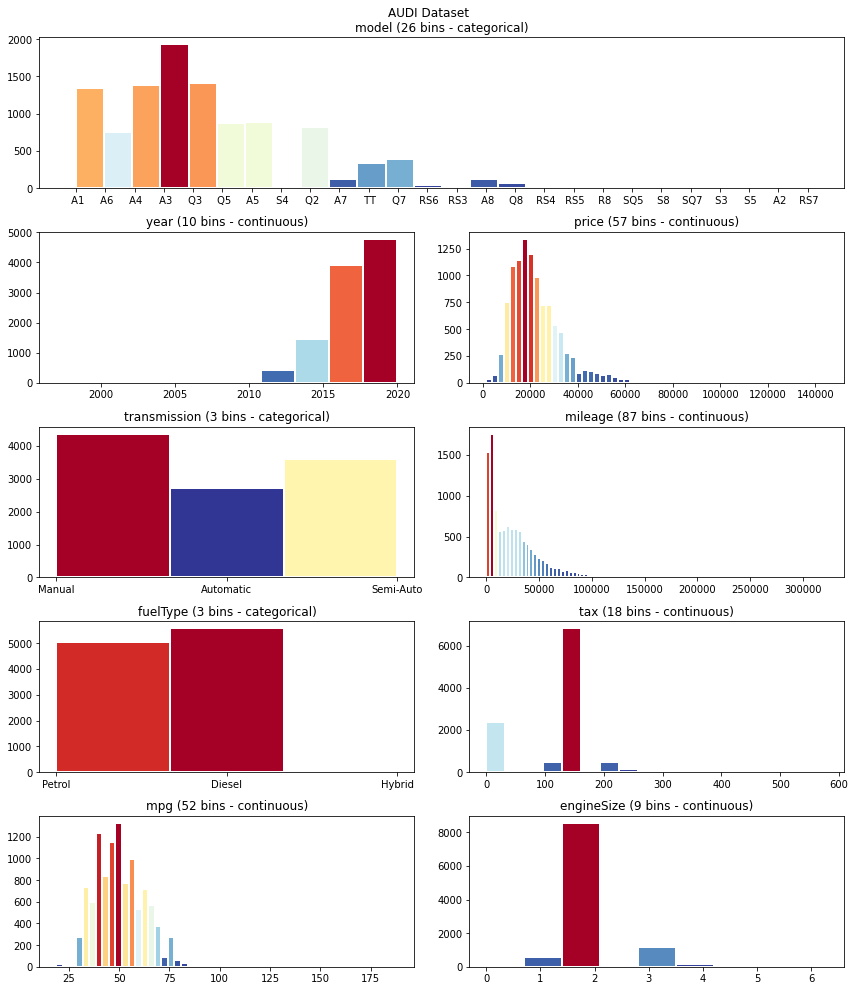

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


 ____   __  __ __          __
|  _ \ |  \/  |\ \        / /
| |_) || \  / | \ \  /\  / / 
|  _ < | |\/| |  \ \/  \/ /  
| |_) || |  | |   \  /\  /   
|____/ |_|  |_|    \/  \/    
                             
                             

True - 24 - 24
False - 25 - 12
False - 3777 - 61
True - 3 - 3
False - 8086 - 89
True - 5 - 5
False - 38 - 19
False - 102 - 51
False - 17 - 8


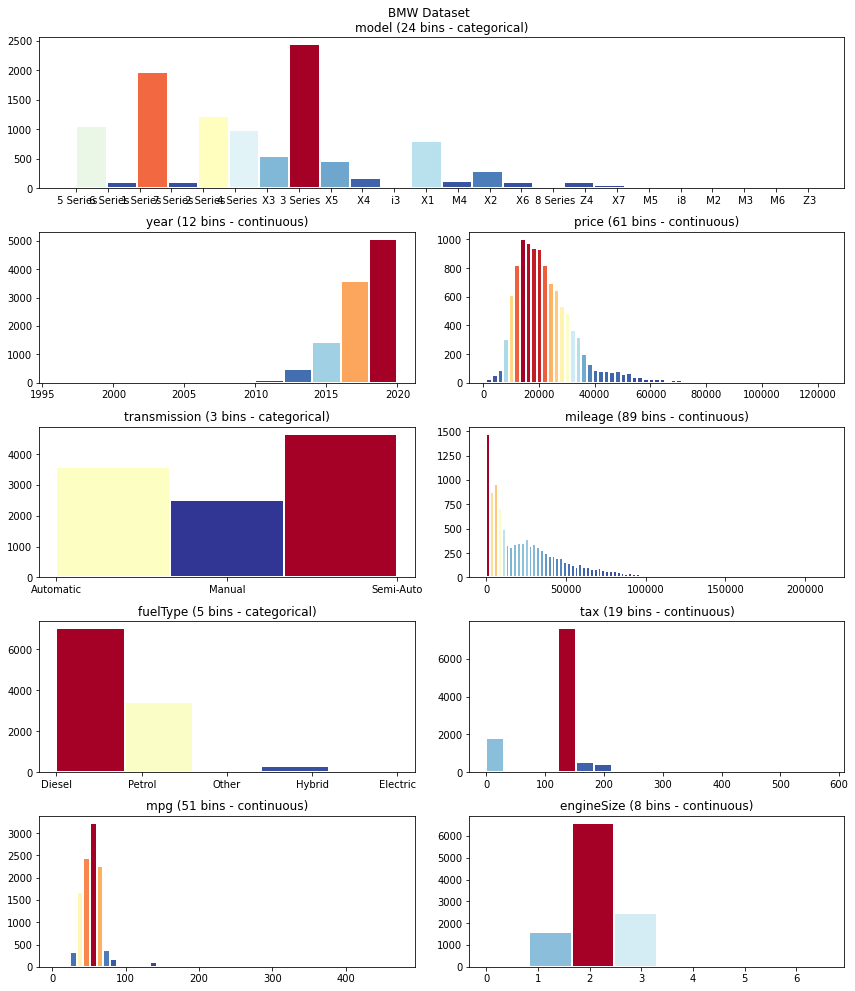

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


 ______   ____   _____   _____  
|  ____| / __ \ |  __ \ |  __ \ 
| |__   | |  | || |__) || |  | |
|  __|  | |  | ||  _  / | |  | |
| |     | |__| || | \ \ | |__| |
|_|      \____/ |_|  \_\|_____/ 
                                
                                

True - 23 - 23
False - 23 - 11
False - 3511 - 59
True - 3 - 3
False - 13528 - 116
True - 5 - 5
False - 35 - 17
False - 90 - 45
False - 16 - 8


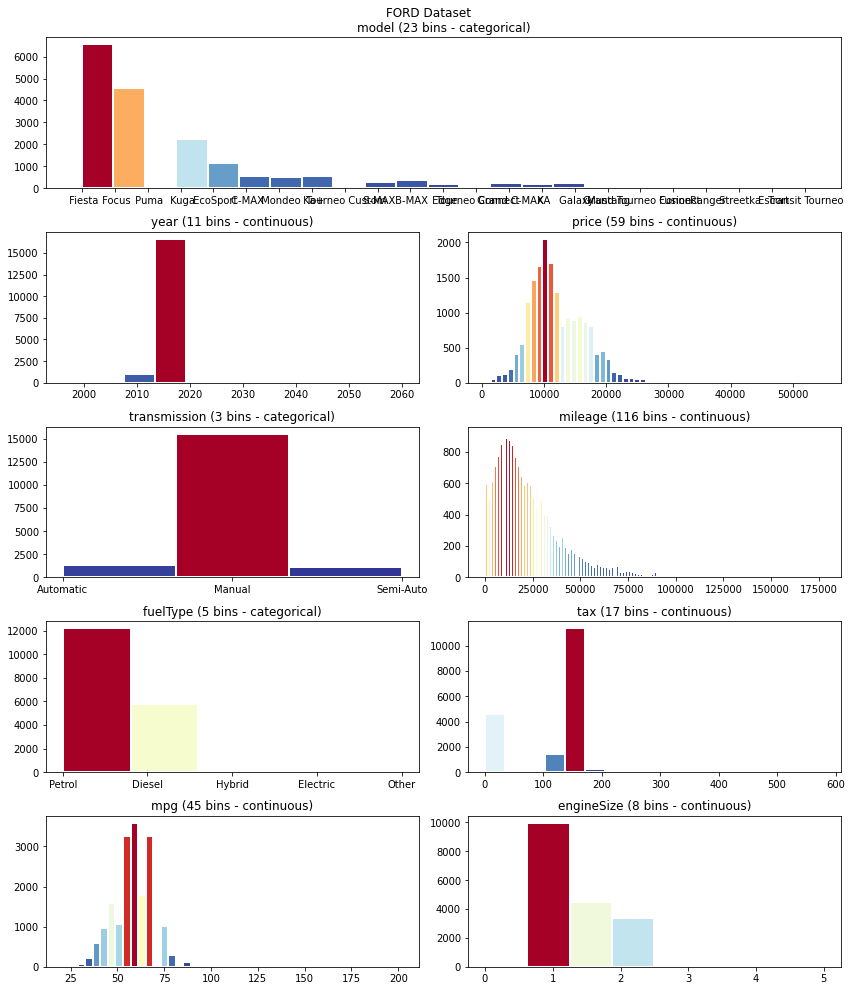

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


 _    _ __     __ _    _  _   _  _____             _____ 
| |  | |\ \   / /| |  | || \ | ||  __ \     /\    |_   _|
| |__| | \ \_/ / | |  | ||  \| || |  | |   /  \     | |  
|  __  |  \   /  | |  | || . ` || |  | |  / /\ \    | |  
| |  | |   | |   | |__| || |\  || |__| | / ____ \  _| |_ 
|_|  |_|   |_|    \____/ |_| \_||_____/ /_/    \_\|_____|
                                                         
                                                         

True - 16 - 16
False - 19 - 9
False - 1685 - 41
True - 4 - 4
False - 4062 - 63
True - 4 - 4
False - 24 - 12
False - 60 - 30
False - 13 - 6


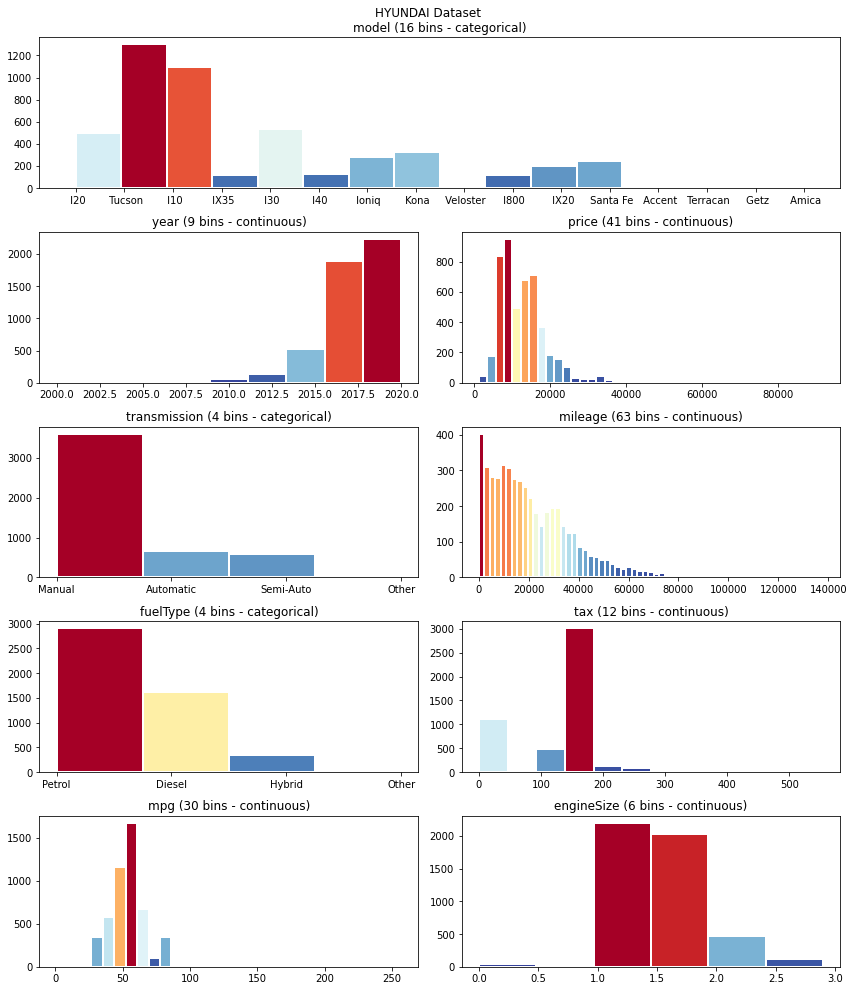

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


 __  __  ______  _____    _____  ______  _____   ______   _____ 
|  \/  ||  ____||  __ \  / ____||  ____||  __ \ |  ____| / ____|
| \  / || |__   | |__) || |     | |__   | |  | || |__   | (___  
| |\/| ||  __|  |  _  / | |     |  __|  | |  | ||  __|   \___ \ 
| |  | || |____ | | \ \ | |____ | |____ | |__| || |____  ____) |
|_|  |_||______||_|  \_\ \_____||______||_____/ |______||_____/ 
                                                                
                                                                

True - 27 - 27
False - 25 - 12
False - 4424 - 66
True - 4 - 4
False - 9716 - 98
True - 4 - 4
False - 40 - 20
False - 120 - 60
False - 26 - 13


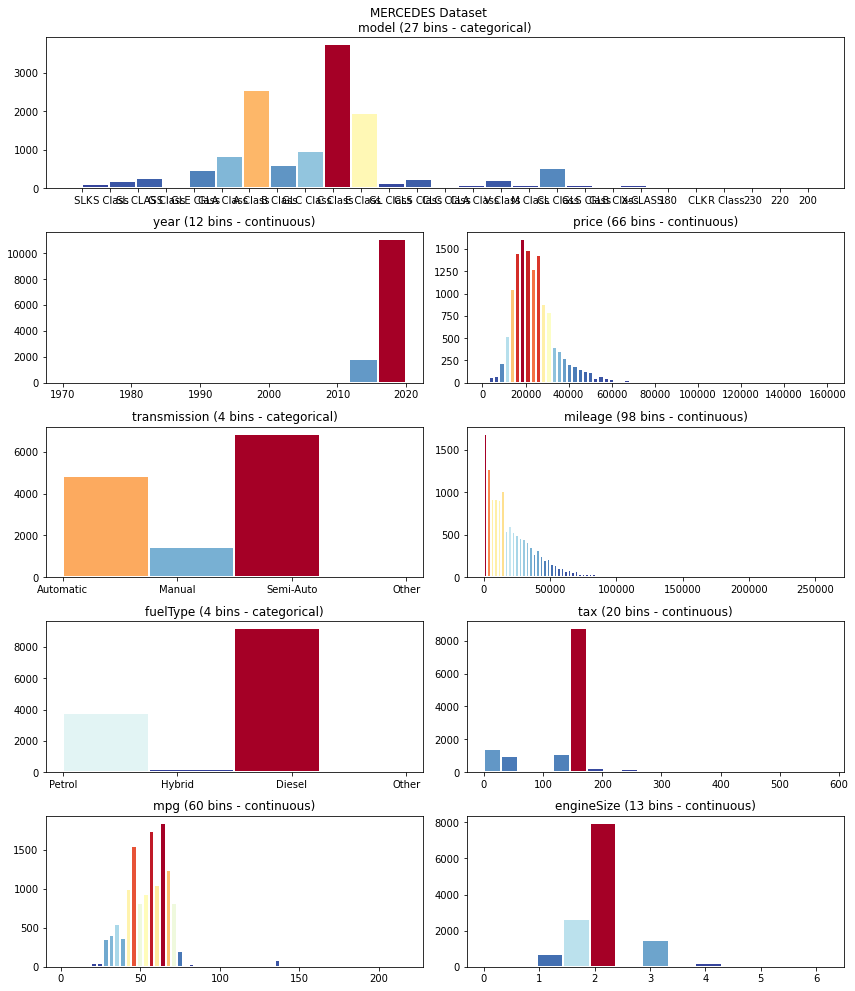

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


 _______   ____  __     __  ____   _______           
|__   __| / __ \ \ \   / / / __ \ |__   __|    /\    
   | |   | |  | | \ \_/ / | |  | |   | |      /  \   
   | |   | |  | |  \   /  | |  | |   | |     / /\ \  
   | |   | |__| |   | |   | |__| |   | |    / ____ \ 
   |_|    \____/    |_|    \____/    |_|   /_/    \_\
                                                     
                                                     

True - 18 - 18
False - 23 - 11
False - 2114 - 45
True - 4 - 4
False - 5699 - 75
True - 4 - 4
False - 29 - 14
False - 81 - 40
False - 16 - 8


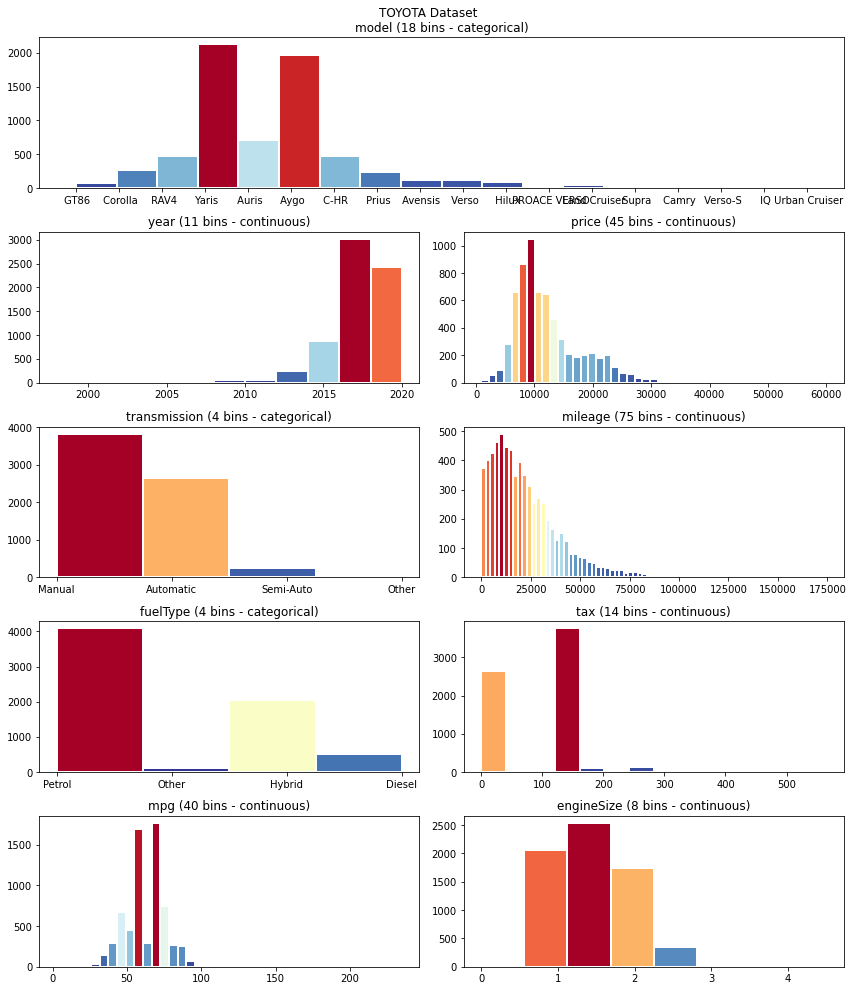

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


  _____   ____   _   _   _____            _______  ______  _   _            _______  ______  _____  
 / ____| / __ \ | \ | | / ____|    /\    |__   __||  ____|| \ | |    /\    |__   __||  ____||  __ \ 
| |     | |  | ||  \| || |        /  \      | |   | |__   |  \| |   /  \      | |   | |__   | |  | |
| |     | |  | || . ` || |       / /\ \     | |   |  __|  | . ` |  / /\ \     | |   |  __|  | |  | |
| |____ | |__| || |\  || |____  / ____ \    | |   | |____ | |\  | / ____ \    | |   | |____ | |__| |
 \_____| \____/ |_| \_| \_____|/_/    \_\   |_|   |______||_| \_|/_/    \_\   |_|   |______||_____/ 
                                                                                                    
                                                                                                    

True - 6 - 6
True - 134 - 134
True - 4 - 4
True - 5 - 5
False - 27 - 13
False - 33533 - 183
False - 48 - 24
False - 186 - 93
False - 40 - 20
False - 10865 - 104


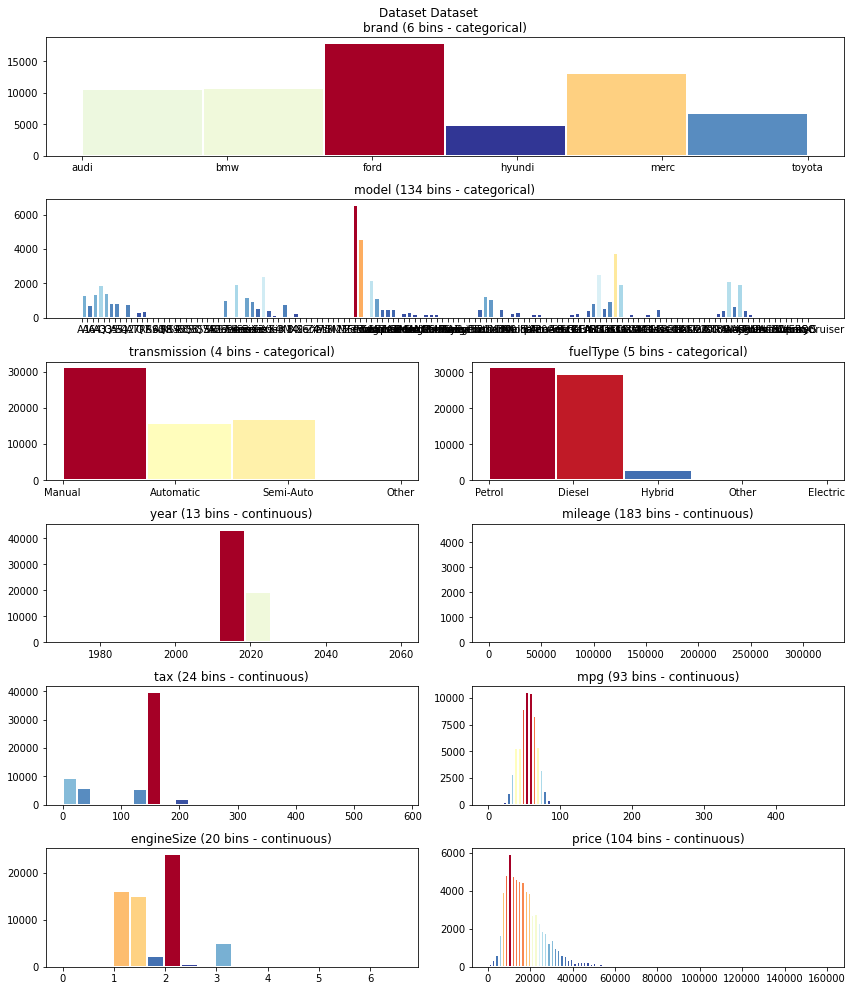

In [262]:
from math import ceil
from art import *
from matplotlib import pyplot as plt
from IPython.core.display import display
from os import listdir
from os.path import isfile, join, basename
import numpy as np
import pandas as pd


def get_csvs_in_dir(dir_path):
    return [join(dir_path, f) for f in listdir(dir_path) if isfile(join(dir_path, f)) and f.endswith('.csv')]


def plot_data(df, title='Dataset', n_cols=2, n_fullsize=1):
    cm = plt.cm.get_cmap('RdYlBu_r')

    plt.figure(figsize=(12, 14))
    plt.suptitle(f'{title} Dataset')

    nrows = ceil((len(df.columns) + 1 )/2)

    for ax_i, df_i in enumerate(df.columns):
        if ax_i < n_fullsize:
            plt.subplot(nrows, 1, ax_i + 1)
        else:
            plt.subplot(nrows, n_cols, ax_i + n_fullsize + 1)


        is_cat = df[df_i].apply(type).eq(str).all()
        n_unique = df[df_i].nunique()

        num_bins = n_unique if is_cat else int(n_unique / 2) if np.sqrt(n_unique) < 20 else int(np.sqrt(n_unique))

        print(f'{is_cat} - {n_unique} - {num_bins}')

        plt.title(f'{df_i} ({num_bins} bins - {"categorical" if is_cat else "continuous"})')

        n, bins, patches = plt.hist(df[df_i], lw=2, ec='white', bins=num_bins)
        col = (n - n.min()) / np.ptp(n)

        for c, p in zip(col, patches):
            plt.setp(p, 'facecolor', cm(c))

    plt.tight_layout()
    plt.show()


def read_csv(filename, print_plot=False):
    df = pd.read_csv(filename)
    if print_plot:
        name = basename(filename).split('.')[0].upper()
        print('=' * 110)
        tprint(name, font='big')

        plot_data(df, name)
        display(df)

    return df


def read_datasets(data_dir):
    # get dataset files

    cars_1_files = get_csvs_in_dir(data_dir)
    # peek at cars 1 datasets

    df_audi = read_csv(cars_1_files[0], print_plot=True)
    df_bmw = read_csv(cars_1_files[1], print_plot=True)
    df_ford = read_csv(cars_1_files[2], print_plot=True)
    df_hyundi = read_csv(cars_1_files[3], print_plot=True)
    df_merc = read_csv(cars_1_files[4], print_plot=True)
    df_toyota = read_csv(cars_1_files[5], print_plot=True)

    # add column for brand of car
    df_audi['brand'] = 'audi'
    df_bmw['brand'] = 'bmw'
    df_ford['brand'] = 'ford'
    df_hyundi['brand'] = 'hyundi'
    df_merc['brand'] = 'merc'
    df_toyota['brand'] = 'toyota'

    # concatenate all dataframes together
    df_cars = pd.concat([df_audi, df_bmw, df_ford, df_hyundi, df_merc, df_toyota])

    # change column order to something that allows us to split it easier later on
    df_cars = df_cars[['brand', 'model', 'transmission', 'fuelType',
                       'year', 'mileage', 'tax', 'mpg', 'engineSize',
                       'price']]
    print('=' * 110)
    print('=' * 110)
    tprint('CONCATENATED', font='big')
    plot_data(df_cars, n_cols=2, n_fullsize=2)
    return df_cars


df_cars = read_datasets('../datasets/car-listing-1')

##  3.2. Clean and Encode Data

In [227]:
from sklearn.preprocessing import OneHotEncoder


def clean_encode_dataset(df_cars_1):
    cars_1_y = df_cars_1.copy().pop('price').to_numpy()

    cars_1_X = df_cars_1.to_numpy()

    # temporarily separate categorical cols from numerical
    num_cols = cars_1_X[:, 4:]
    cat_cols = cars_1_X[:, :4]

    print('=' * 60)
    print("# One-Hot-Encoding")
    # One-Hot Encode string values
    enc = OneHotEncoder(sparse=False)
    cat_cols_enc = enc.fit_transform(cat_cols)

    cars_1_X_enc = np.hstack((cat_cols_enc, num_cols)).astype(np.float32)

    print(cars_1_X_enc)

    return cars_1_X_enc, cars_1_y


cars_1_X_enc, cars_1_y = clean_encode_dataset(df_cars)

KeyError: 'price'

## 3.3. Train-Test Split

In [222]:
from sklearn.model_selection import train_test_split

print('=' * 60)

print('=' * 60)
print("# Train-Test Split")
X_train, X_test, y_train, y_test = train_test_split(
    cars_1_X_enc, cars_1_y, test_size=0.3, shuffle=True)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_test shape: {y_test.shape}")

print('=' * 60)

# Train-Test Split
X_train shape: (51304, 154)
y_train shape: (51304,)
X_test shape: (12827, 154)
X_test shape: (12827,)


## 3.4. Define Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras import losses
from keras import optimizers


def model_builder(hp):
    model = Sequential()

    hp_kernel_initializer = hp.Choice(
        'kernel_initializer', values=['random_normal', 'random_uniform', 'zeros', 'glorot_normal', 'glorot_uniform'])

    hp_input_activation = hp.Choice('input_activation',
                                    values=['relu', 'sigmoid', 'tanh'])

    # Define INPUT layer
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=hp_input_activation,
                    kernel_initializer=hp_kernel_initializer,
                    name='layer_input'))

    for i in range(hp.Int('layers', 1, 6)):
        hp_hidden_units = hp.Int(
            f'hidden_{i}_units', min_value=32, max_value=512, step=32)
        hp_hidden_activation = hp.Choice(f'hidden_{i}_activation',
                                         values=['relu', 'sigmoid', 'tanh'])
        model.add(Dense(hp_hidden_units, activation=hp_hidden_activation,
                        kernel_initializer=hp_kernel_initializer,
                        name=f'layer_hidden_{i}'))

    # Define OUTPUT layer
    model.add(Dense(1, activation='linear',
                    kernel_initializer=hp_kernel_initializer,
                    name='layer_output'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile model
    model.compile(loss=losses.MeanAbsoluteError(),
                  optimizer=tf.keras.optimizers.Adam(
                      learning_rate=hp_learning_rate),
                  metrics=[metrics.MeanAbsoluteError(), metrics.MeanSquaredError(), metrics.RootMeanSquaredError()])

    # Print out model summary
    # print(model.summary())
    return model


print('=' * 60)


## 3.5. Define Model Callbacks

In [ ]:
from keras import callbacks

# Define checkpoint callback for model saving
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
log_dir = 'tb-logs'

cb_checkpoint = callbacks.ModelCheckpoint(
    f'models/{checkpoint_name}', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
cb_early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, mode='auto')
cb_tensorboard = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


## 3.6. Hyperparameter Tuning

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=500,
                     factor=3,
                     directory='models',
                     project_name='car_prices',
                     overwrite=True)

print('=' * 60)
print("# ", end='')
print(tuner.search_space_summary())
print('=' * 60)
print()

tuner.search(X_train, y_train, epochs=500, validation_split=0.2,
             callbacks=[cb_early_stopping, cb_tensorboard])


## 3.7. Print Results Summary

In [ ]:
print('=' * 60)
print("# ", end='')
summary = tuner.results_summary(num_trials=1)
print(summary)

print('=' * 60)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Best Hyperparams: {best_hps}')

### Trial 1 Results Summary:
# Results summary
Results in models/car_prices
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
kernel_initializer: glorot_normal
input_activation: relu
layers: 2
hidden_0_units: 128
hidden_0_activation: relu
learning_rate: 0.01
hidden_1_units: 224
hidden_1_activation: relu
hidden_2_units: 288
hidden_2_activation: tanh
hidden_3_units: 480
hidden_3_activation: relu
hidden_4_units: 320
hidden_4_activation: sigmoid
hidden_5_units: 480
hidden_5_activation: relu
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 9bf58eee151b6212ad5a66d0d53bb522
Score: 17684080.0
None


# 4. Evaluation:
- Describe your evaluation.



# 5. Future Work:
- Describe what could follow your work.


# 6. Contributions:
- Describe the contributions of each team member.